#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Define plot saving function

In [118]:
# Setting up default settings for plots, rc = Runtime configuration

plt.rc('figure',figsize = (10,6))          
plt.rc('font',size =14)                    # Defining font size for all texts (unless overriden)
plt.rc('xtick', labelsize = 14)            # you know what tick and tick_label is right?
plt.rc('ytick', labelsize = 14)
plt.rc('axes',labelsize= 14, titlesize= 10)   # Defining config of Xaxis, Yaxis and title

#### Get the dataset

In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784',version=1)
X,y = np.array(mnist['data']), np.array(mnist['target'])
X.shape,y.shape

((70000, 784), (70000,))

#### Train-Test split

In [4]:
# Train-Test Split
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [ ]:
def plot_image(image_data):
    image_data = image_data.reshape(28,28)
    plt.imshow(image_data,cmap='binary')
    plt.axis(False)
    

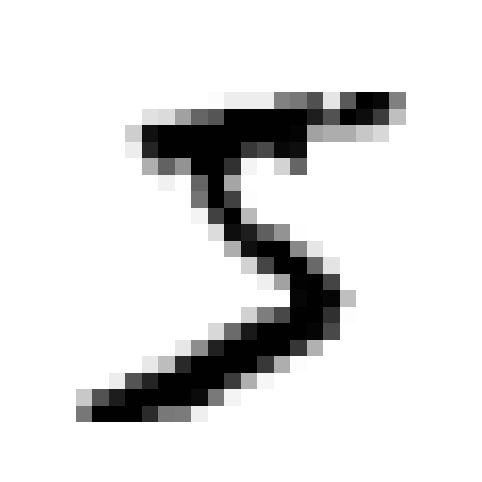

In [6]:
plot_image(X[0])

# _Multiclass Classification/Multinomial Classification_

There are two ways in which we can perform multiclass classification 
1. Use multiclass classifiers
2. Use multiple binary classifiers

There are two ways to use binary classifiers for multiclass classification
1. OvR (One vs Rest/One vs All) 
    - We train one binary classifier for each class
    - Each classifier learn to detect "that class" or "not that class"
    - During prediction, all the classifiers run, one with the highest score decides the final class

    eg. In this dataset, we will train 10 binary classifier for all 10 classes(0-9), 1st classifier give score for any image to be "0"or"Not 0", 1st will give score for "1"or"not 1" and so on...

2. OvO (One vs One)
    - We train one binary classifier for each pair of classes
    - For _n_ number of classes we get <sup>n</sup>C<sub>2</sub> = $\frac{(n)*(n-1)}{2}$
    - During prediction, each model gives its vote and the class with most number of votes is selected

    eg. In this dataset, we will train 10*9/2 = 45 binary classifiers that will vote to give final output (predict class), 1st classifier is trained on "0"or"1", 2nd on "0"or"2" and so on....


#### ___OvR (One-vs-Rest) Strategy___
- Use when:
    - You have many classes.
    - The classifier is fast to train (e.g., Logistic Regression, Naive Bayes).
    - You're dealing with large datasets.

- Avoid when:
    - Your classifier struggles with imbalanced data.
    - You want to handle very fine decision boundaries.

#### ___OvO (One-vs-One) Strategy___
- Use when:
    - You have fewer classes (like ≤10–15).
    - You’re using slow-to-train models like SVM, where small datasets are ideal.
    - You need high accuracy on well-separated classes.

- Avoid when:
    - Number of classes is large (you’ll end up with too many classifiers).
    - Dataset is huge (due to computation overhead).

### How they works? 
suppose you have dataset with classes A,B,C

- __OvR__  : train 3 classifiers that gives score for final decision
    1. classifier : A vs (B+C)
    2. classifier : B vs (A+C)
    3. classifier : C vs (A+B) 

- __OvO__ : train 3 classifiers that gives vote for final decision
    1. classifier : A vs B
    2. classifier : B Vs C
    3. classifier : C vs A


Finally : 
1. If the data is huge, use OvO. Because it trains classifiers on small subsets (only two classes at a time)
2. If algorithm can handle large data smoothly, prefer OvR. 
3. _sklearn handles this automatically_ - it chooses which one to use itself

#### ___SVC (Support Vector Machines Classifier)___ 

In [7]:
#From support vector machines import support vector machine classifier
from sklearn.svm import SVC

svm_classifier = SVC(gamma='auto',random_state=42)
svm_classifier.fit(X_train[:1000],y_train[:1000])   # note that → y_train (0-9), not y_train_5 

# We are fitting only first 1000 instances cuz it will take fking long time for complete dataset

SVC(gamma='auto', random_state=42)

In [8]:
some_digit = X[0]
svm_classifier.predict([some_digit])

array(['5'], dtype=object)

Under the hood,  
Scikit-Learn actually used the OvO strategy: it trained 45 binary classifiers, got their
decision scores for the image, and selected the class that won the most duels.

In [9]:
# Check the scores
some_digit_scores = svm_classifier.decision_function([some_digit])
some_digit_scores

array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

Now, unlike binary classifier(where we get one score), here we have 10 scores for each instance!  
but, wait!......  
There are 45 classifiers working in backend right? each classifier should give its score? No!  
Only those classifiers that are trained for X vs 5, give their scores. (To get the score of 5 you dont want scores from 3 vs 2 classifier right?)  
Thats why we get 10 scores for each instance, since there are 10 classes.

In [10]:
np.argmax(some_digit_scores)

np.int64(5)

#### ___If you want to decide to choose OvR or OvO___

Use OneVsRestClassifier or OneVsOneClassifier and give classifier to its constructor

In [11]:
from sklearn.multiclass import OneVsRestClassifier
ovr_svm_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_svm_clf.fit(X_train[:1000], y_train[:1000])

OneVsRestClassifier(estimator=SVC(gamma='auto', random_state=42))

In [12]:
print(ovr_svm_clf.predict([some_digit]))

['5']


In [13]:
(ovr_svm_clf.estimators_)
# It shows the estimators that are used in classification
# 10 estimators (binary classifiers)

[SVC(gamma='auto', random_state=42),
 SVC(gamma='auto', random_state=42),
 SVC(gamma='auto', random_state=42),
 SVC(gamma='auto', random_state=42),
 SVC(gamma='auto', random_state=42),
 SVC(gamma='auto', random_state=42),
 SVC(gamma='auto', random_state=42),
 SVC(gamma='auto', random_state=42),
 SVC(gamma='auto', random_state=42),
 SVC(gamma='auto', random_state=42)]

### ___SGD classifier___

But previously we used this for only binary classification right?

In [14]:
from sklearn.linear_model import SGDClassifier

sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(X_train[:1000],y_train[:1000])

SGDClassifier(random_state=42)

In [15]:
#This would have took 30 mins to run, if i let it fit all 60000 instances

In [16]:
sgd_classifier.predict([some_digit])

array(['5'], dtype='<U1')

In [17]:
sgd_classifier.decision_function([some_digit])

array([[-6049581.97985829, -6138036.45541781, -3886281.38604606,
         -604692.42366776, -6948311.32017537,   914498.2913215 ,
        -6855666.78647961, -3866146.33271573, -4016434.08430155,
        -3209136.89074954]])

In [18]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(sgd_classifier,X_train[:1000],y_train[:1000],cv=3,scoring='accuracy')
scores

array([0.83233533, 0.82882883, 0.79279279])

SGD_classifier even here gives a high accuracy,  
and since this data is not as so much skewed or imbalanced, we can rely on accuracy this time

In [21]:
# But with Feature Scaling, we can increase the accuracy
from sklearn.preprocessing import StandardScaler

std_scalar = StandardScaler()
scaled_x_train = std_scalar.fit_transform(X_train)

In [22]:
scores = cross_val_score(sgd_classifier,scaled_x_train[:1000],y_train[:1000],cv=3,scoring='accuracy')
scores

array([0.84431138, 0.81381381, 0.77177177])

#### Find the best model
The next step is finding the best model, fine tune its hyperparameters using GridSearch or RandomSearch   
but since we dont really know much about hyperparameters of these classifiers (SVC, SGD) so we gonna skip this and learn next steps   
Assume we got std_classifier as best model

### ___Error Analysis___


In [23]:
y_pred = sgd_classifier.predict(X_train)
y_pred

array(['5', '0', '4', ..., '5', '6', '8'], shape=(60000,), dtype='<U1')

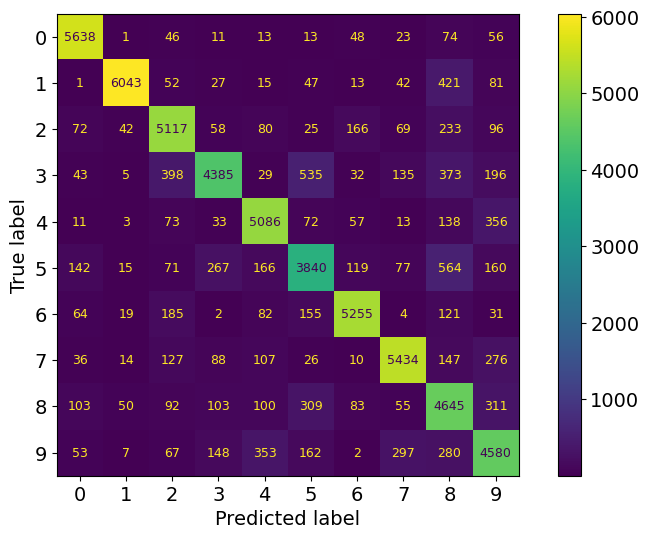

In [34]:
# Confusion matrix 
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_train,y_pred)


from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true=y_train,y_pred=y_pred)
plt.rc('font',size = 6)

Observations: 
- The diagonal are Correct Predictions. Its good that all rows have mojority correct predictions.

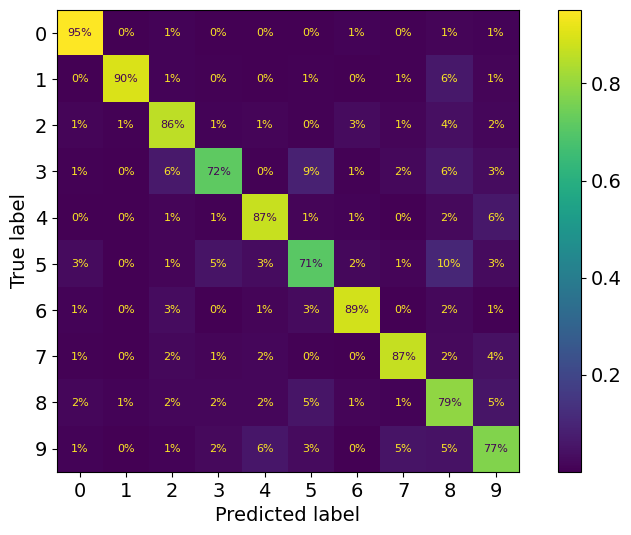

In [49]:
# Calculate percentage of instances in each square
plt.rc('font',size='8')
ConfusionMatrixDisplay.from_predictions(y_train,y_pred,normalize='true',values_format=".0%")

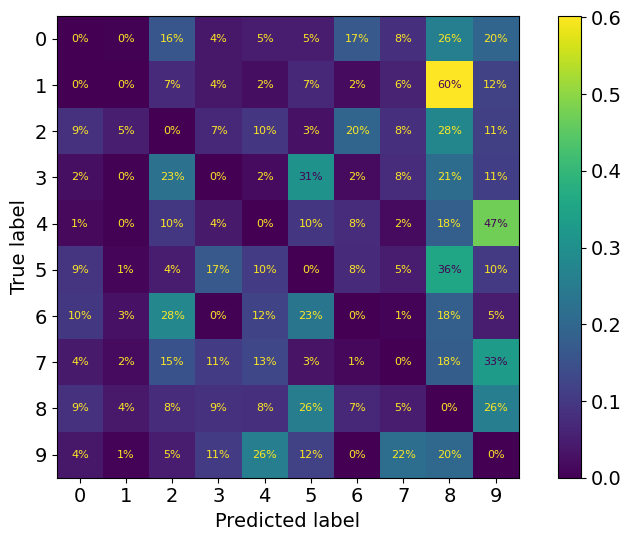

In [ ]:
sample_weight = (y_pred != y_train)

ConfusionMatrixDisplay.from_predictions(y_train,y_pred,
                                        sample_weight=sample_weight,
                                        normalize='true',values_format='.0%')

Explaination:   
sample_weight assigns weight to the samples, initially weight of each sample is assigned 1.  
- by giving custom sample_weight = (y_pred != y_true) we are giving weight of 1 to false prediction and 0 to true predictions.  
- Hence the matrix can be read as: in box (1,8), 60% of false predictions of '1' lies, i.e 60% out of all false predictions of '1' are falsely classified as '8'

Observations:   
- This problem of wrong classification lies highly for '8', see that almost every row, a high percentage of wrong classification lies in '8' column.  
-  it seems that efforts should be spent on reducing
 the false 8s. 
    -  try to gather more training data for digits that
 look like 8s (but are not) so that the classifier can learn to distinguish them from real
 8s.
    - engineer new features that would help the classifier—for example,
 writing an algorithm to count the number of closed loops (e.g., 8 has two, 6 has one, 5
 has none). Or you could preprocess the images (e.g., using Scikit-Image, Pillow, or
 OpenCV) to make some patterns, such as closed loops, stand out more
- Also 47% of false '4' are classified as '9'....

#### Analysing individual errors

In [72]:
class_a, class_b = '3','5'

X_aa = X_train[(y_train==class_a) & (y_pred==class_a)]
X_ab = X_train[(y_train==class_a) & (y_pred==class_b)]
X_ba = X_train[(y_train==class_b) & (y_pred==class_a)]
X_bb = X_train[(y_train==class_b) & (y_pred==class_b)]

In [112]:
import matplotlib as mpl
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

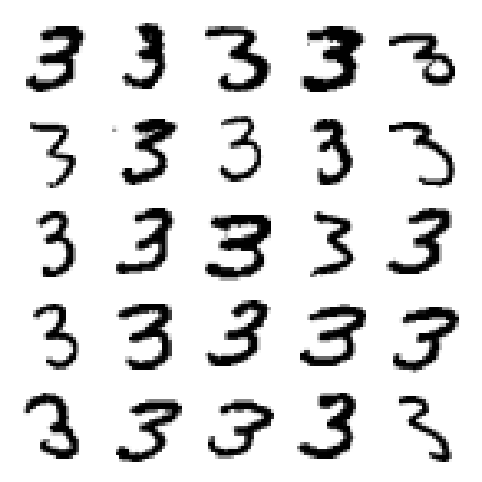

In [113]:
plot_digits(X_aa[:25],images_per_row=5)

(Text(0.5, 1.0, '5 correctly classified as 5'), None)

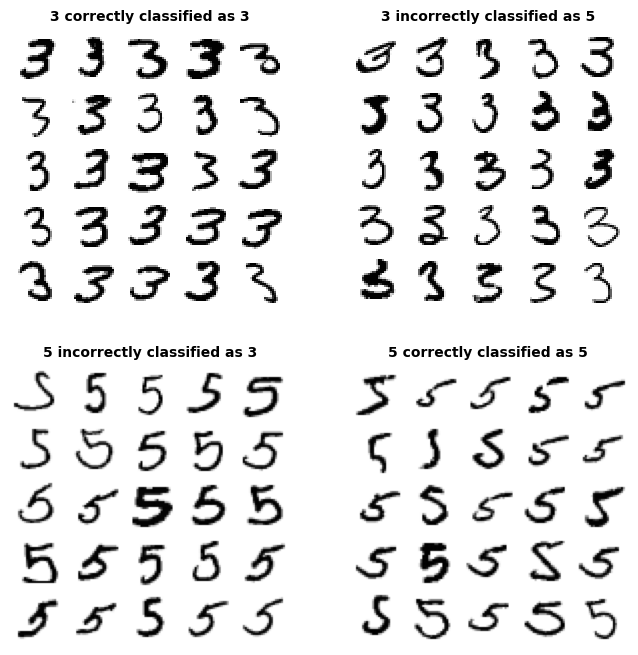

In [119]:
plt.figure(figsize=(8,8))
plt.subplot(221); plt.title("3 correctly classified as 3"),plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plt.title("3 incorrectly classified as 5"),plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plt.title("5 incorrectly classified as 3"),plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plt.title("5 correctly classified as 5"),plot_digits(X_bb[:25], images_per_row=5)

Points to notice
- Two 5×5 blocks on the left show digits predicted as 3s; two 5×5 blocks on the right show digits predicted as 5s.
- Some misclassified digits are so poorly written that even humans might struggle to classify them.
- Most misclassifications seem obvious errors, yet the simple model still makes these mistakes.
- The classifier is a linear SGDClassifier that assigns a weight per class to each pixel and sums the weighted pixels to compute a score.
- Since 3s and 5s differ only in a few pixels—especially the position of the small joining line—the model easily confuses them.
- The classifier is highly sensitive to image shifting and rotation.
- Preprocessing the images to ensure they’re centered and not rotated could help reduce the confusion between 3s and 5s.